# Plotting routine for the Sep 2022 Event - PSP

In [ ]:
test = 'test'

In [1]:
%load_ext autoreload

%autoreload 2

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pickle as p

import datetime as datetime
from datetime import timedelta
import seaborn as sns
import pandas as pd
from pandas.plotting import table
import os
#import copy as cp

import multiprocessing
import py3dcore_h4c as py3dcore_h4c

import py3dcore_h4c.fluxplot as fp

#plt.switch_backend('agg')


import warnings
warnings.filterwarnings('ignore')

import logging

logging.basicConfig(level=logging.INFO)
logging.getLogger("heliosat.spice").setLevel("WARNING")
logging.getLogger("heliosat.spacecraft").setLevel("WARNING")
#logging.getLogger("sunpy").setLevel("WARNING")
#logging.getLogger("py3dcore_h4c.fluxplot").setLevel("WARNING")

#print(sns.__version__)

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


#### setting the times for py3DCORE_h4c

In [3]:
t_launch = datetime.datetime(2022, 9, 5, 16, tzinfo=datetime.timezone.utc) # 

t_s = datetime.datetime(2022, 9, 5, 19, tzinfo=datetime.timezone.utc) 
t_e = datetime.datetime(2022, 9, 6, 1, tzinfo=datetime.timezone.utc)

t_fit = [
        #datetime.datetime(2022, 9, 5, 19, 5, tzinfo=datetime.timezone.utc),
        datetime.datetime(2022, 9, 5, 19, 30, tzinfo=datetime.timezone.utc),
        datetime.datetime(2022, 9, 5, 20, tzinfo=datetime.timezone.utc),
        datetime.datetime(2022, 9, 5, 20, 30, tzinfo=datetime.timezone.utc),
        datetime.datetime(2022, 9, 5, 21, tzinfo=datetime.timezone.utc),
        datetime.datetime(2022, 9, 5, 21, 30, tzinfo=datetime.timezone.utc),
        datetime.datetime(2022, 9, 5, 22, tzinfo=datetime.timezone.utc),
        datetime.datetime(2022, 9, 5, 22, 30, tzinfo=datetime.timezone.utc),
        datetime.datetime(2022, 9, 5, 23, tzinfo=datetime.timezone.utc),
        datetime.datetime(2022, 9, 6, 0, tzinfo=datetime.timezone.utc)
    ]

#t_fit = fp.equal_t_creator(start = start, n = 4, delta = 6)

#####2022 Sep 5: 3 solar radii at 17 UT (COR2 & LASCO FoV appearance)
# 2022 Sep 5: 15 solar radii at 18:45 UT (PSP)

#### loading the pickle files

In [4]:
fittingPoints = []

fittingPoints = [t_fit[i].strftime("%m/%d/%Y, %H:%M:%S") for i in range(len(t_fit))]
print(fittingPoints)

['09/05/2022, 19:30:00', '09/05/2022, 20:00:00', '09/05/2022, 20:30:00', '09/05/2022, 21:00:00', '09/05/2022, 21:30:00', '09/05/2022, 22:00:00', '09/05/2022, 22:30:00', '09/05/2022, 23:00:00', '09/06/2022, 00:00:00']


In [5]:
path = 'output/psp05092022_heeq_512_1/'

filepath = fp.loadpickle(path, number = -1)

In [6]:
filepath[:-7]

'output/psp05092022_heeq_512_1/08'


#### extracting parameters

In [7]:
res, allres, ind, meanparams = fp.get_params(filepath, give_mineps=True)

INFO:py3dcore_h4c.fluxplot:Retrieved the following parameters for the run with minimum epsilon:
INFO:py3dcore_h4c.fluxplot: --lon:  115.95
INFO:py3dcore_h4c.fluxplot: --lat:  2.20
INFO:py3dcore_h4c.fluxplot: --inc:  124.65
INFO:py3dcore_h4c.fluxplot: --diameter 1 AU:  0.23
INFO:py3dcore_h4c.fluxplot: --aspect ratio:  2.44
INFO:py3dcore_h4c.fluxplot: --launch radius:  6.42
INFO:py3dcore_h4c.fluxplot: --launch speed:  1323.81
INFO:py3dcore_h4c.fluxplot: --t factor:  -186.22
INFO:py3dcore_h4c.fluxplot: --expansion rate:  0.81
INFO:py3dcore_h4c.fluxplot: --magnetic field decay rate:  1.64
INFO:py3dcore_h4c.fluxplot: --magnetic field 1 AU:  9.59
INFO:py3dcore_h4c.fluxplot: --drag coefficient:  3.69
INFO:py3dcore_h4c.fluxplot: --background sw speed:  68.34


In [8]:
print(meanparams)

[ 0.0000000e+00  1.1248043e+02  7.4945188e+00  1.2444793e+02
  3.0035016e-01  2.0656006e+00  6.7544427e+00  1.1438215e+03
 -1.5899107e+02  8.7548119e-01  1.6400100e+00  9.5153160e+00
  3.0866790e+00  1.2844856e+02]


In [9]:
out = fp.get_ensemble_stats(filepath)

In [10]:
out.describe()

,lon,lat,inc,D1AU,delta,launch radius,launch speed,t factor,B1AU,gamma,vsw
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,112.480461,7.494519,124.447906,0.300350,2.065601,6.754446,1143.821533,-158.991028,9.515319,3.086679,128.448578
std,7.257511,16.844852,11.259194,0.034311,0.869894,1.266759,291.834534,44.600445,2.359678,0.647492,78.982346
min,87.589142,-25.683828,84.159622,0.200081,1.000300,5.007063,704.215271,-249.552383,6.222764,1.161508,50.177895
25%,107.356136,-5.707108,117.914150,0.275136,1.300755,5.820746,923.901688,-193.051846,8.128087,2.652923,77.031425
50%,112.076031,5.103833,125.858452,0.303814,1.834987,6.546947,1076.804016,-158.995384,8.925126,3.255546,106.486000
75%,118.021494,22.356861,131.539143,0.330366,2.785216,7.342363,1338.688385,-124.798576,9.993235,3.598115,150.192513
max,131.560852,44.028778,153.234161,0.349952,3.962102,11.968904,1985.906494,-55.744110,22.813356,3.999885,573.495850


In [11]:
# write output of describe() to csv-file
out.describe().to_csv(filepath+'parameters.csv')

# write parameters of whole ensemble to txt-file
with open(filepath+'parameters_ensemble.txt', 'a') as f:
    dfAsString = out.to_string(header=True, index=True)
    f.write(dfAsString)


In [12]:
names = ['lon: ', 'lat: ', 'inc: ', 'diameter 1 AU: ', 'aspect ratio: ', 'launch radius: ', 'launch speed: ', 
         't factor: ', 'expansion rate: ', 'magnetic field decay rate: ', 'magnetic field 1 AU: ', 'drag coefficient: ', 
         'background sw speed: ']
 
# write output of describe() to txt-file    
with open(filepath+'parameters_summary.txt', 'a') as f:
    dfAsString = out.describe().to_string(header=True, index=True)
    f.write(dfAsString)   
    f.write('\n')
    f.write('Fitting points:')
    f.write(str(fittingPoints))
    f.write('\n')
    f.write('Parameters for run with min(eps):')
    f.write('\n')
    for count, name in enumerate(names):
        f.write(" --{} {:.2f}".format(name, res[count+1]))
        f.write('\n')

#### loading and plotting the fitting results

In [ ]:
t_s = datetime.datetime(2022, 9, 5, 18, tzinfo=datetime.timezone.utc) 
t_e = datetime.datetime(2022, 9, 6, 3, tzinfo=datetime.timezone.utc)

INFO:py3dcore_h4c.fluxplot:No iparams_arr given, using parameters for run with minimum eps.
INFO:py3dcore_h4c.fitter.base:Using custom datafile: psp_2022sep.p


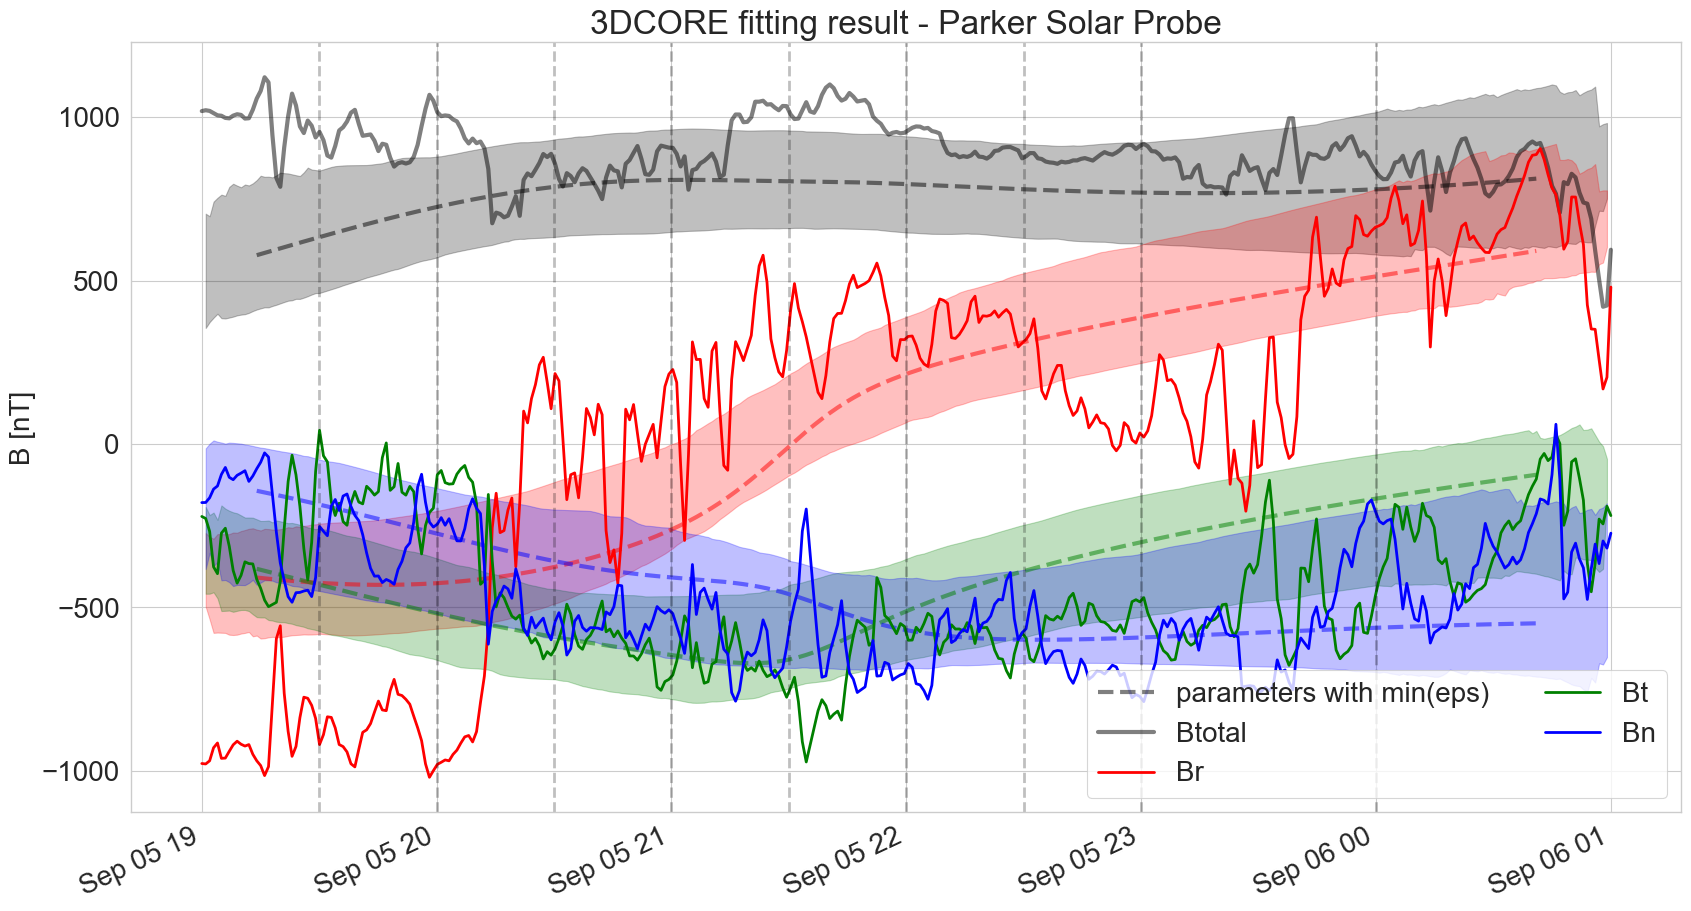

In [13]:
fp.fullinsitu(observer='PSP', t_fit=t_fit, start=t_s, end=t_e, filepath=filepath, custom_data='psp_2022sep.p', best=True, ensemble=True, 
              mean=False, save_fig=True, legend=True, fixed=None, max_index=512, title=True, fit_points=True)

In [ ]:
fp.scatterparams(filepath)

In [ ]:
print(out['lon'].mean())
print(out['lon'].std())
print(out['launch radius'].std())
print(out['launch speed'].std())

#### Plotting the fluxrope and spacecraft positions

In [ ]:
#measurement times 
#tm0 =  t_launch + datetime.timedelta(days=1.5)
tm0 =  datetime.datetime(2022, 9, 5, 16)
tm1 =  datetime.datetime(2022, 9, 5, 19)
# tm1 = t_launch + datetime.timedelta(days=1.7)
tm2 =  t_launch + datetime.timedelta(days=3.5)

fig = fp.full3d(spacecraftlist=['psp'], t=tm1, filepath=filepath, custom_data='psp_sep2022.p',
               view_azim=0, view_elev=90, view_radius=0.1) #, planetlist =['Earth']

### make fluxrope 3d movie

In [ ]:
def make_frame(k):
    #tm0 = datetime.datetime(2022, 9, 5, 19)
    tm0 =  datetime.datetime(2022, 9, 5, 16)
    t = tm0 + k*datetime.timedelta(hours=1)
    
    fig = fp.full3d(spacecraftlist=['psp'], planetlist =['Earth'],
              t = t, filepath = filepath, save_fig = False)
    frmstr = '%05i' % (k) 
    plt.savefig(filepath[:-7] + 'movie_3d/'+frmstr+'.jpg',dpi=200)  
    return fig
    

In [ ]:
inn=[i for i in range(50)]


mpool = multiprocessing.Pool(processes=5)
mpool.map(make_frame, inn[0:49])
mpool.close()
mpool.join()

print('done 1/4')

#mpool = multiprocessing.Pool(processes=5)
#mpool.map(make_frame, inn[20:60])
#mpool.close()
#mpool.join()

#print('done 2/4')

#mpool = multiprocessing.Pool(processes=5)
#mpool.map(make_frame, inn[40:60])
#mpool.close()
#mpool.join()

#print('done 3/4')

#mpool = multiprocessing.Pool(processes=5)
#mpool.map(make_frame, inn[40:80])
#mpool.close()
#mpool.join()

#print('done 4/4')

In [ ]:
os.system('ffmpeg -r 25 -i '+filepath[:-7]+'movie_3d/%05d.jpg -b 5000k -r 25 '+filepath[:-7]+'movie_3d/full_3d_movie.mp4 -y -loglevel quiet')

### plot fluxrope 3d multiview

In [ ]:
#measurement times 
#tm0 =  t_launch + datetime.timedelta(days=1.5)
tm0 =  datetime.datetime(2022, 9, 5, 16)
tm1 =  datetime.datetime(2022, 9, 5, 20, 30)
tm2 =  t_launch + datetime.timedelta(days=3.5)

fig = fp.full3d_multiview(t_launch = t_launch, filepath=filepath)

### make fluxrope 3d multiview movie

In [ ]:
def make_frame2(k):
    tm0 = datetime.datetime(2022, 9, 5, 16)
    t = tm0 + k*datetime.timedelta(hours=1)
    frametime = k
    
    fig = fp.full3d_multiview_movie(t_launch = tm0, t = t, filepath=filepath,
                                    frametime=k)
    frmstr = '%05i' % (k) 
    plt.savefig(filepath[:-7] + 'movie_3d_multiview/'+frmstr+'.jpg',dpi=200)  
    return fig

In [ ]:
inn=[i for i in range(50)]


mpool = multiprocessing.Pool(processes=5)
mpool.map(make_frame2, inn[0:49])
mpool.close()
mpool.join()

print('done 1/4')

#mpool = multiprocessing.Pool(processes=5)
#mpool.map(make_frame2, inn[20:40])
#mpool.close()
#mpool.join()

#print('done 2/4')

#mpool = multiprocessing.Pool(processes=5)
#mpool.map(make_frame2, inn[40:60])
#mpool.close()
#mpool.join()

#print('done 3/4')

#mpool = multiprocessing.Pool(processes=5)
#mpool.map(make_frame2, inn[40:80])
#mpool.close()
#mpool.join()

#print('done 4/4')

In [ ]:
os.system('ffmpeg -r 25 -i '+filepath[:-7]+'movie_3d_multiview/%05d.jpg -b 5000k -r 25 '+filepath[:-7]+'movie_3d/full_3d_multiview_movie.mp4 -y -loglevel quiet')

# Used for Debug

In [ ]:
TP_A =  t_launch + datetime.timedelta(hours=2)
TP_B =  t_launch + datetime.timedelta(hours=40)


C_A = "xkcd:red"
C_B = "xkcd:blue"
    
sns.set_style('whitegrid')

fig = plt.figure(figsize=(15, 11),dpi=100)

ax1 = plt.subplot2grid((2, 3), (0, 0),rowspan=2,colspan=2,projection='3d')  
ax2 = plt.subplot2grid((2, 3), (0, 2),projection='3d')  
ax3 = plt.subplot2grid((2, 3), (1, 2),projection='3d')  

model_obj = fp.returnmodel(filepath)


fp.plot_configure(ax1, view_azim=150, view_elev=25, view_radius=.2,light_source=True) #view_radius=.08

fp.plot_3dcore(ax1, model_obj, TP_A, color=C_A,light_source = True)
fp.plot_3dcore(ax1, model_obj, TP_B, color=C_B,light_source = True)

fp.plot_shift(ax1,0.31,-0.25,0.0,-0.2)


fp.plot_configure(ax2, view_azim=165-90, view_elev=90, view_radius=.08,light_source=True)
    
fp.plot_3dcore(ax2, model_obj, TP_A, color=C_A,light_source = True)
fp.plot_3dcore(ax2, model_obj, TP_B, color=C_B,light_source = True)

fp.plot_shift(ax2,0.26,-0.41,0.08,0.0)



fp.plot_configure(ax3, view_azim=65, view_elev=-5, view_radius=.01,light_source=True)
    
fp.plot_3dcore(ax3, model_obj, TP_A, color=C_A,light_source = True)
fp.plot_3dcore(ax3, model_obj, TP_B, color=C_B,light_source = True)

fp.plot_shift(ax3,0.26,-0.41,0.08,0.0)

